In [1]:
from google.colab import files
uploaded = files.upload()


Saving heart (1).csv to heart (1).csv


In [7]:
!pip install --upgrade frozendict

  Attempting uninstall: frozendict
    Found existing installation: frozendict 1.2
    Uninstalling frozendict-1.2:
      Successfully uninstalled frozendict-1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
experta 1.9.4 requires frozendict==1.2, but you have frozendict 2.4.6 which is incompatible.


In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import mutual_info_classif
from experta import *
import joblib
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import plot_tree
features=pd.read_csv('heart (1).csv')
features

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1.0,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0.0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1.0,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1.0,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1.0,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1.0,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0.0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0.0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0.0,159,0,0.0,2,0,2,1


In [10]:
missing_values=features.isna().sum()
missing_values

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,1
thalach,0
exang,0
oldpeak,2


In [11]:
median=features.median()
features.fillna(median, inplace=True)

In [12]:
missing_values.isna().sum()

np.int64(0)

In [13]:
features.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   float64
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(2), int64(12)
memory usage: 112.2 KB


In [15]:
from sklearn.preprocessing import MinMaxScaler
scaled_features = ["age","trestbps", "chol", "thalach","oldpeak"]
scaler = MinMaxScaler()
features[scaled_features] = scaler.fit_transform(features[scaled_features])

features.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.479167,1,0,0.292453,0.196347,0,1.0,0.740458,0,0.161290,2,2,3,0
1,0.500000,1,0,0.433962,0.175799,1,0.0,0.641221,1,0.500000,0,0,3,0
2,0.854167,1,0,0.481132,0.109589,0,1.0,0.412214,1,0.419355,0,0,3,0
3,0.666667,1,0,0.509434,0.175799,0,1.0,0.687023,0,0.000000,2,1,3,0
4,0.687500,0,0,0.415094,0.383562,1,1.0,0.267176,0,0.306452,1,3,2,0


In [16]:
features.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [17]:
categ_features = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"]
features= pd.get_dummies(features, columns=categ_features,drop_first=False)


In [18]:
features.columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target', 'sex_0',
       'sex_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1',
       'restecg_0.0', 'restecg_1.0', 'restecg_2.0', 'exang_0', 'exang_1',
       'slope_0', 'slope_1', 'slope_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4',
       'thal_0', 'thal_1', 'thal_2', 'thal_3'],
      dtype='object')

In [19]:
correlation_threshold = 0.2  #
correlation_matrix = features.corr()
correlation_with_target = correlation_matrix["target"].abs()
selected_features = correlation_with_target[correlation_with_target > correlation_threshold].index.tolist()
features = features[selected_features]

In [20]:
features.columns

Index(['age', 'thalach', 'oldpeak', 'target', 'sex_0', 'sex_1', 'cp_0', 'cp_1',
       'cp_2', 'exang_0', 'exang_1', 'slope_1', 'slope_2', 'ca_0', 'ca_1',
       'ca_2', 'ca_3', 'thal_2', 'thal_3'],
      dtype='object')

In [21]:
features.to_csv("cleaned_data.csv", index=False)
print("Data preprocessing and feature selection completed. Saved as cleaned_data.csv.")

Data preprocessing and feature selection completed. Saved as cleaned_data.csv.


In [22]:
print(features.describe())

               age      thalach      oldpeak       target
count  1025.000000  1025.000000  1025.000000  1025.000000
mean      0.529878     0.596291     0.172825     0.513171
std       0.189006     0.175616     0.189503     0.500070
min       0.000000     0.000000     0.000000     0.000000
25%       0.395833     0.465649     0.000000     0.000000
50%       0.562500     0.618321     0.129032     1.000000
75%       0.666667     0.725191     0.290323     1.000000
max       1.000000     1.000000     1.000000     1.000000


In [23]:
numerical_cols = features.select_dtypes(include=['float64', 'int64']).columns

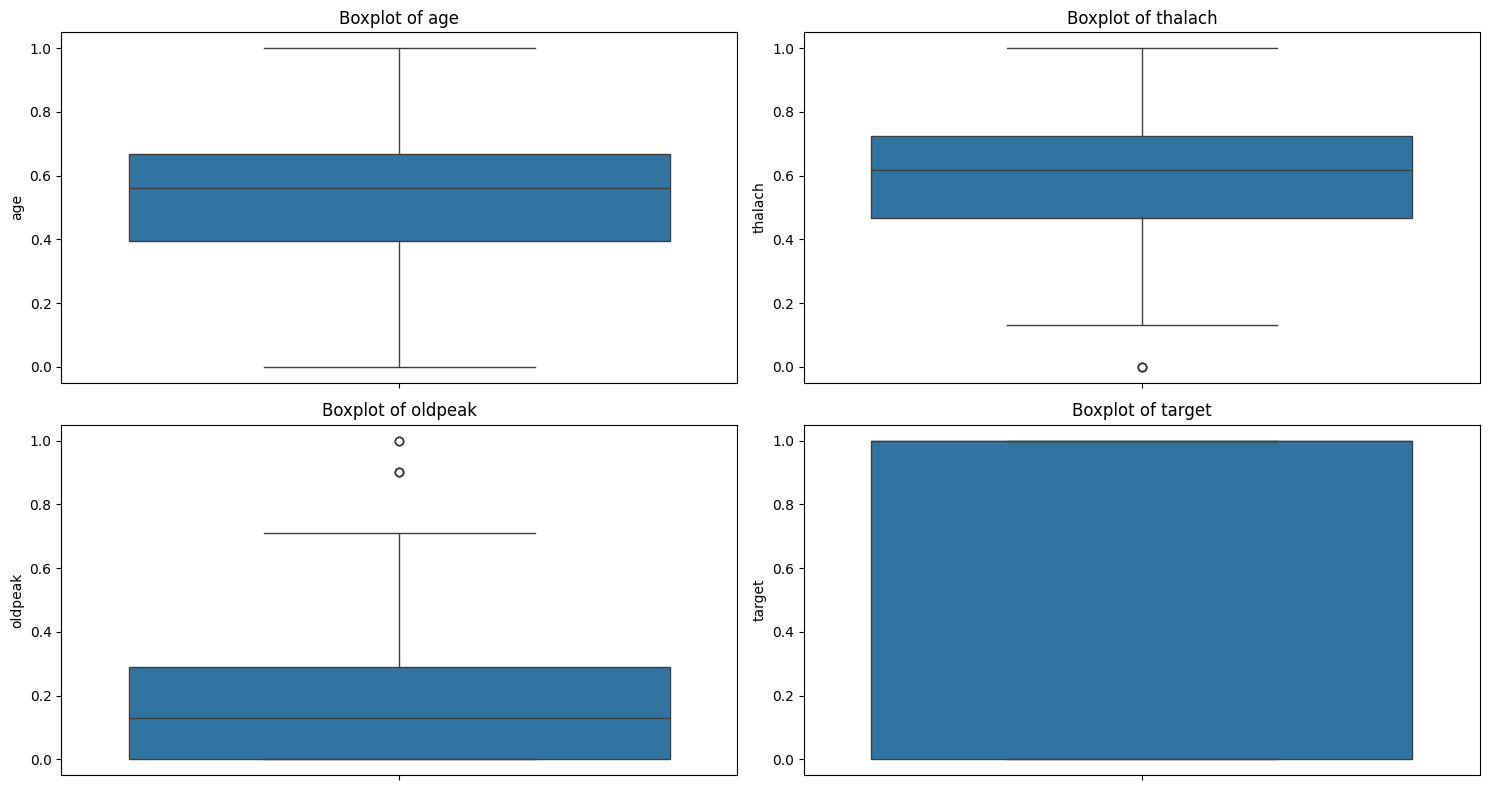

In [24]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, (len(numerical_cols) + 1) // 2, i)
    sns.boxplot(y=features[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

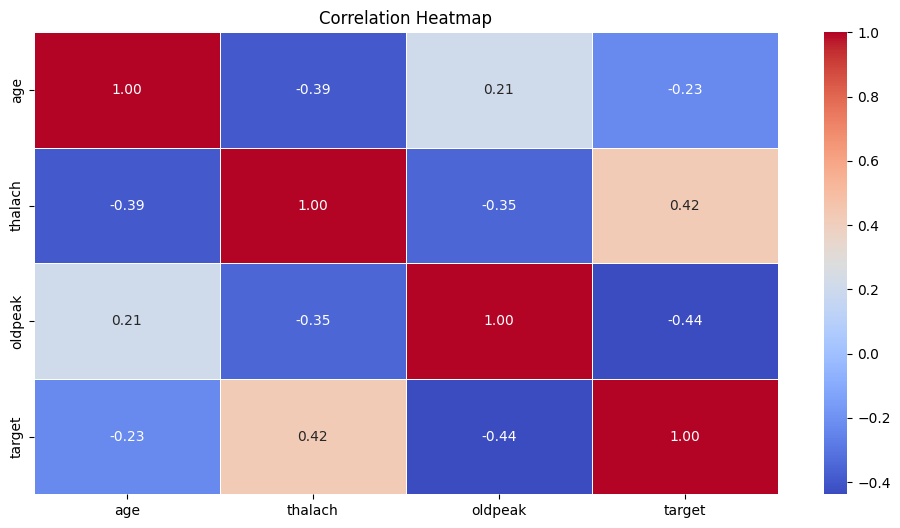

In [25]:
plt.figure(figsize=(12, 6))
corr_matrix = features[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


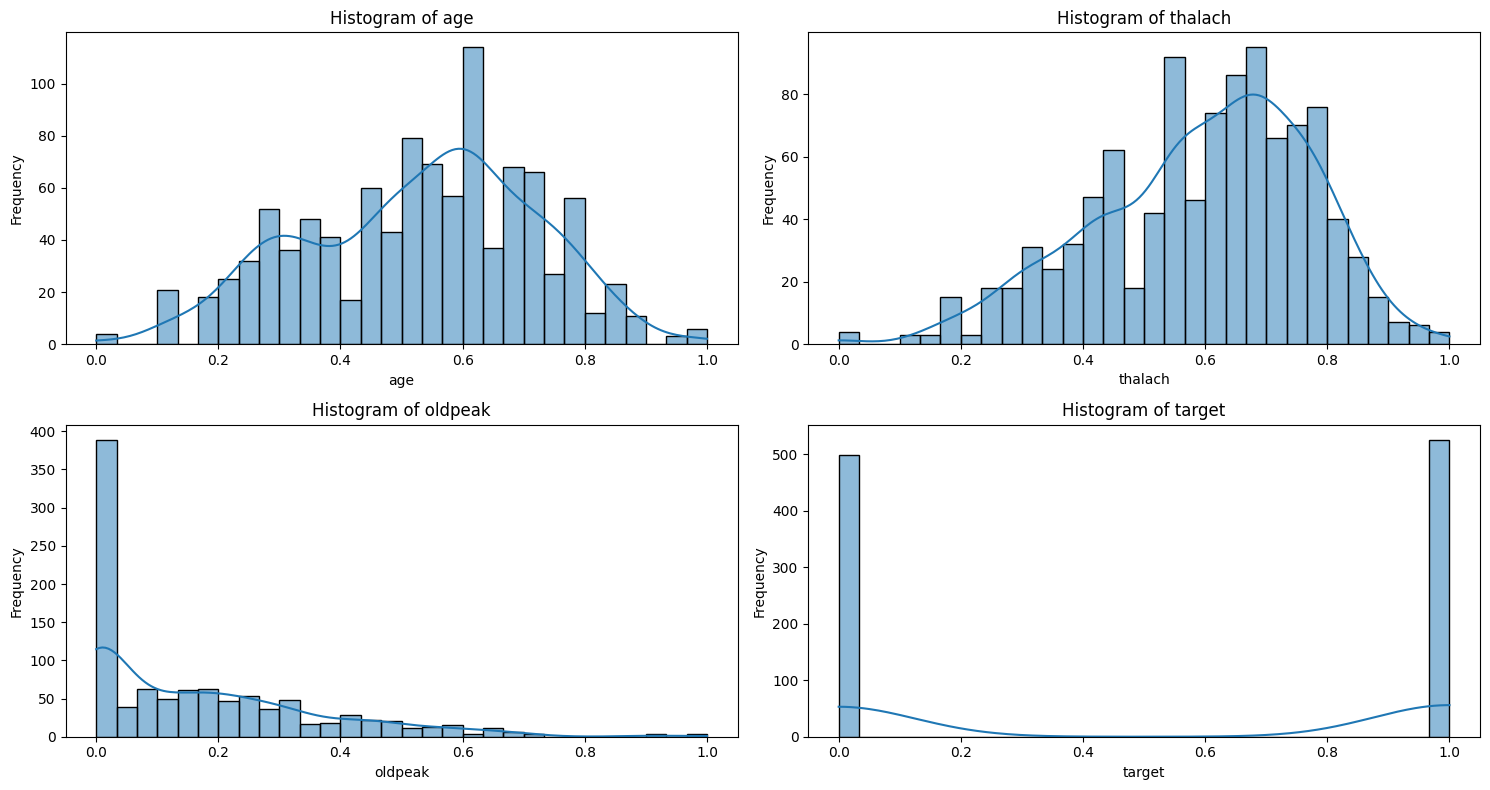

In [26]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, (len(numerical_cols) + 1) // 2, i)
    sns.histplot(features[col], bins=30, kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Random Forest Accuracy: 0.99
Naïve Bayes Accuracy: 0.82
SVM Accuracy: 0.82


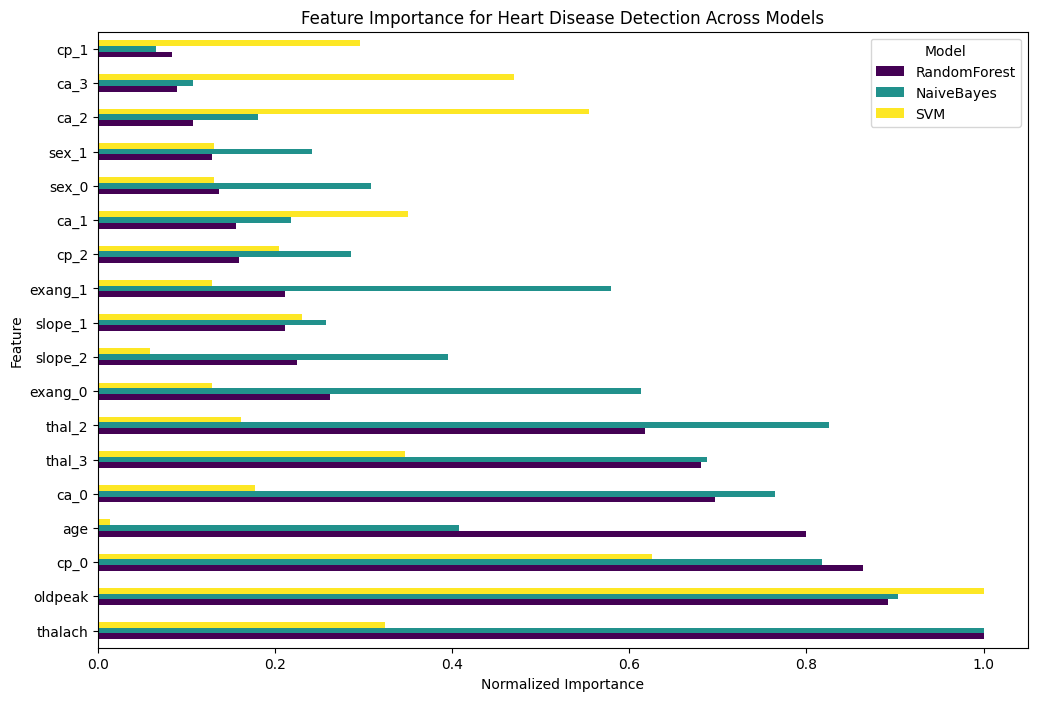

In [27]:
# Split data
y = features['target']
X = features.drop(columns=['target'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to calculate accuracy
def calculate_accuracy(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

# Train models and calculate accuracy
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_accuracy = calculate_accuracy(rf_model, X_train, X_test, y_train, y_test)

nb_model = GaussianNB()
nb_accuracy = calculate_accuracy(nb_model, X_train, X_test, y_train, y_test)

svm_model = SVC(kernel='linear', random_state=42)
svm_accuracy = calculate_accuracy(svm_model, X_train, X_test, y_train, y_test)

# Print accuracies
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")
print(f"Naïve Bayes Accuracy: {nb_accuracy:.2f}")
print(f"SVM Accuracy: {svm_accuracy:.2f}")

# Feature Importance Plot
rf_importances = rf_model.feature_importances_
nb_importances = mutual_info_classif(X, y, random_state=42)
svm_importances = np.abs(svm_model.coef_).flatten()

# Combine feature importances
feature_names = X.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'RandomForest': rf_importances,
    'NaiveBayes': nb_importances,
    'SVM': svm_importances
})

# Normalize importances
feature_importance_df.set_index('Feature', inplace=True)
feature_importance_df = feature_importance_df / feature_importance_df.max()
feature_importance_df = feature_importance_df.sort_values(by='RandomForest', ascending=False)

# Plot feature importance
feature_importance_df.plot(kind='barh', figsize=(12, 8), colormap='viridis')
plt.title('Feature Importance for Heart Disease Detection Across Models')
plt.xlabel('Normalized Importance')
plt.ylabel('Feature')
plt.legend(title='Model')
plt.show()


In [28]:
# Define Expert System for Heart Disease Detection
class HeartDiseaseRisk(Fact):
    """Represents a patient's health data for heart disease detection."""
    pass

class HeartDiseaseExpertSystem(KnowledgeEngine):
    @Rule(HeartDiseaseRisk(age=P(lambda x: x > 60)))
    def rule_old_age(self):
        self.declare(Fact(risk="High"))

    @Rule(HeartDiseaseRisk(thalach=P(lambda x: x < 100)))
    def rule_low_max_heart_rate(self):
        self.declare(Fact(risk="High"))

    @Rule(HeartDiseaseRisk(oldpeak=P(lambda x: x > 2.0)))
    def rule_st_depression(self):
        self.declare(Fact(risk="High"))

    @Rule(HeartDiseaseRisk(cp_2=1))
    def rule_chest_pain(self):
        self.declare(Fact(risk="High"))

    @Rule(HeartDiseaseRisk(exang_1=1))
    def rule_exercise_angina(self):
        self.declare(Fact(risk="High"))

    @Rule(HeartDiseaseRisk(slope_2=1))
    def rule_slope_of_st(self):
        self.declare(Fact(risk="Moderate"))

    @Rule(HeartDiseaseRisk(ca_2=1))
    def rule_coronary_artery_count(self):
        self.declare(Fact(risk="High"))

    @Rule(HeartDiseaseRisk(age=P(lambda x: x < 40)))
    def rule_young_age(self):
        self.declare(Fact(risk="Low"))

    @Rule(HeartDiseaseRisk(oldpeak=P(lambda x: 1.0 <= x <= 2.0)))
    def rule_moderate_st_depression(self):
        self.declare(Fact(risk="Moderate"))

    @Rule(HeartDiseaseRisk(thalach=P(lambda x: 100 <= x <= 140)))
    def rule_moderate_max_heart_rate(self):
        self.declare(Fact(risk="Moderate"))

    @Rule(Fact(risk=MATCH.r))
    def final_risk(self, r):
        self.risk_level = r

    def assess_risk(self, patient_data):
        self.reset()
        self.declare(HeartDiseaseRisk(**patient_data))
        self.run()
        return 1 if self.risk_level == "High" else 0

# Function for User Input Risk Assessment
def user_input_risk_assessment():
    engine = HeartDiseaseExpertSystem()
    engine.reset()

    # Prompt user for health parameters
    age = int(input("Enter age: "))
    thalach = int(input("Enter maximum heart rate: "))
    oldpeak = float(input("Enter ST depression value: "))
    cp_2 = int(input("Enter 1 if chest pain type is 2, otherwise 0: "))
    exang_1 = int(input("Enter 1 if exercise-induced angina is present, otherwise 0: "))
    slope_2 = int(input("Enter 1 if ST segment slope is 2, otherwise 0: "))
    ca_2 = int(input("Enter 1 if coronary artery count is 2, otherwise 0: "))

    # Declare facts for expert system
    engine.declare(HeartDiseaseRisk(
        age=age, thalach=thalach, oldpeak=oldpeak,
        cp_2=cp_2, exang_1=exang_1, slope_2=slope_2, ca_2=ca_2
    ))

    engine.run()
    print(f"User input risk assessment: {'High' if engine.risk_level == 'High' else 'Moderate' if engine.risk_level == 'Moderate' else 'Low'}")

if __name__ == "__main__":
    user_input_risk_assessment()


target = "target"
if target not in features.columns:
    raise KeyError(f"Target column '{target}' not found in dataset. Available columns: {features.columns}")



Enter age: 22
Enter maximum heart rate: 45
Enter ST depression value: 22
Enter 1 if chest pain type is 2, otherwise 0: 33
Enter 1 if exercise-induced angina is present, otherwise 0: 4
Enter 1 if ST segment slope is 2, otherwise 0: 11
Enter 1 if coronary artery count is 2, otherwise 0: 66
User input risk assessment: Low


In [29]:
X = features.drop(columns=[target])
y = features[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


param_grid = {
    "max_depth": [3, 5, 10, None],
    "min_samples_split": [2, 5, 10]
}


grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


best_model = DecisionTreeClassifier(**best_params)
best_model.fit(X_train, y_train)


y_pred = best_model.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


joblib.dump(best_model, "heart_disease_model.pkl")

print("Model training completed and saved as 'heart_disease_model.pkl'.")


Best Hyperparameters: {'max_depth': None, 'min_samples_split': 2}
Accuracy: 0.9853658536585366
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

Model training completed and saved as 'heart_disease_model.pkl'.


In [30]:
X = features.drop(columns=[target])
y = features[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


param_grid = {
    "max_depth": [3, 5, 10, None],
    "min_samples_split": [2, 5, 10]
}


grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


best_model = DecisionTreeClassifier(**best_params)
best_model.fit(X_train, y_train)


y_pred = best_model.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


joblib.dump(best_model, "heart_disease_model.pkl")

print("Model training completed and saved as 'heart_disease_model.pkl'.")


Best Hyperparameters: {'max_depth': None, 'min_samples_split': 2}
Accuracy: 0.9853658536585366
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

Model training completed and saved as 'heart_disease_model.pkl'.


Decision Tree Accuracy on Validation Set: 0.5414634146341464
Decision Tree Report:
               precision    recall  f1-score   support

           0       0.83      0.14      0.24       106
           1       0.51      0.97      0.67        99

    accuracy                           0.54       205
   macro avg       0.67      0.56      0.46       205
weighted avg       0.68      0.54      0.45       205

Expert System Accuracy on Validation Set: 0.3121951219512195
Expert System Report:
               precision    recall  f1-score   support

           0       0.18      0.09      0.12       106
           1       0.36      0.55      0.43        99

    accuracy                           0.31       205
   macro avg       0.27      0.32      0.28       205
weighted avg       0.27      0.31      0.27       205


Feature Importance (Decision Tree Model):


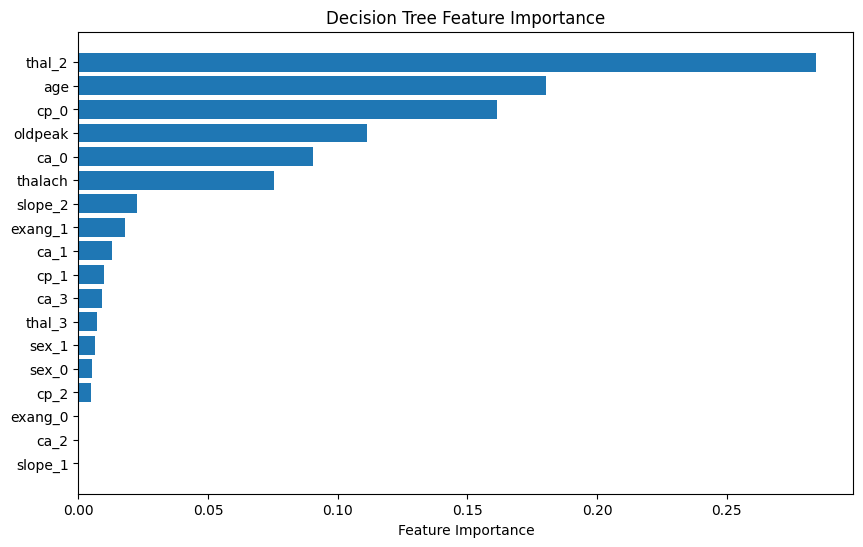

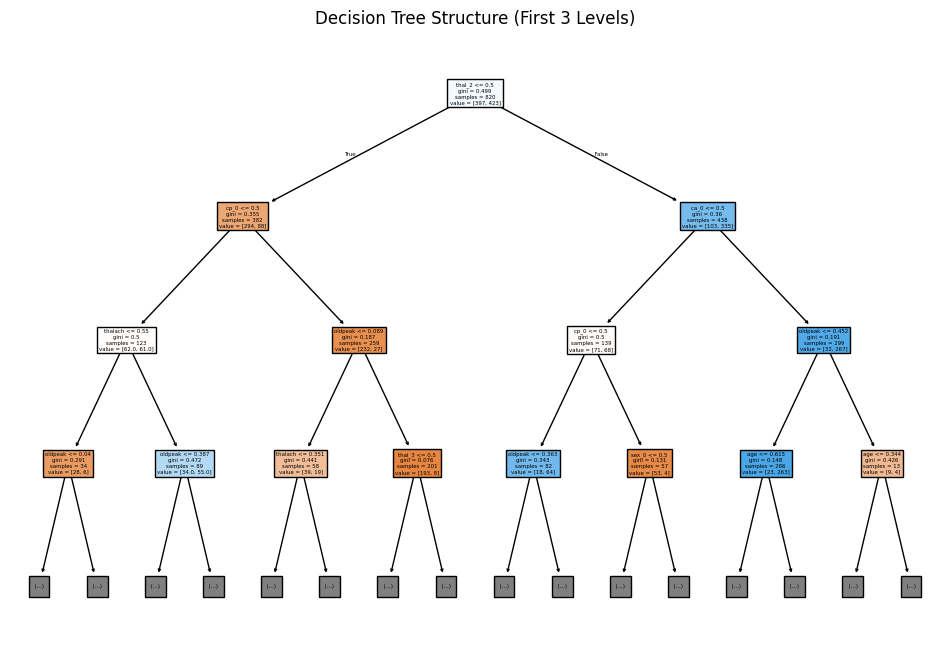


EXPLAINABILITY ANALYSIS:
- The Decision Tree makes predictions based on learned feature importance.
- The Expert System makes predictions using predefined rules.
- If the tree aligns well with the rules, it means the data patterns support expert knowledge.
- If they differ significantly, it suggests the rules might need revision or the tree model needs more training.


In [31]:
# Convert boolean values to integers
features = features.astype(int)
X = features.drop(columns=["target"])
y = features["target"]

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Load decision tree model
dt_model = joblib.load("heart_disease_model.pkl")

# Get predictions from decision tree model on validation set
y_pred_dt = dt_model.predict(X_val)

# Get predictions from expert system
es_predictions = []
expert_system = HeartDiseaseExpertSystem()
for _, row in X_val.iterrows():
    expert_system.reset()  # Reset the system for each patient
    patient_data = row.to_dict()
    es_predictions.append(expert_system.assess_risk(patient_data))

y_pred_es = pd.Series(es_predictions)

# Compare accuracies
print("Decision Tree Accuracy on Validation Set:", accuracy_score(y_val, y_pred_dt))
print("Decision Tree Report:\n", classification_report(y_val, y_pred_dt, zero_division=1))

print("Expert System Accuracy on Validation Set:", accuracy_score(y_val, y_pred_es))
print("Expert System Report:\n", classification_report(y_val, y_pred_es, zero_division=1))

#  EXPLAINABILITY: Decision Tree vs. Expert System Rules
print("\nFeature Importance (Decision Tree Model):")
feature_importances = dt_model.feature_importances_
feature_names = X.columns
sorted_idx = feature_importances.argsort()

# Plot Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Decision Tree Feature Importance")
plt.show()

# Visualizing Decision Tree Structure
plt.figure(figsize=(12, 8))
plot_tree(dt_model, feature_names=X.columns, filled=True, max_depth=3)
plt.title("Decision Tree Structure (First 3 Levels)")
plt.show()

# Explainability Summary
print("\nEXPLAINABILITY ANALYSIS:")
print("- The Decision Tree makes predictions based on learned feature importance.")
print("- The Expert System makes predictions using predefined rules.")
print("- If the tree aligns well with the rules, it means the data patterns support expert knowledge.")
print("- If they differ significantly, it suggests the rules might need revision or the tree model needs more training.")

